Temperature = 32
Humidity = 70
Fan Speed Output = 82.38095238095238


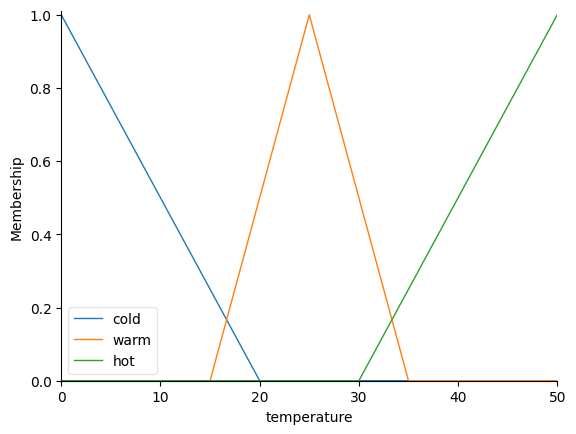

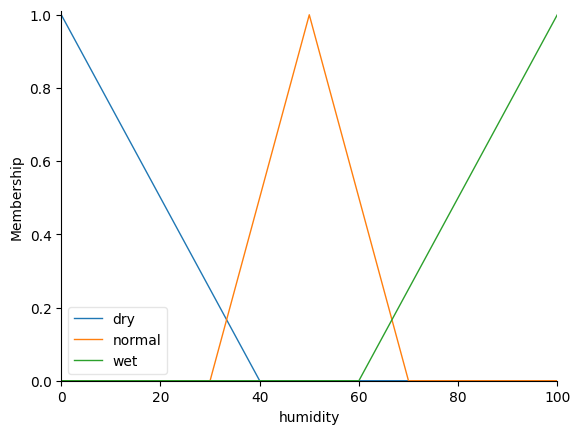

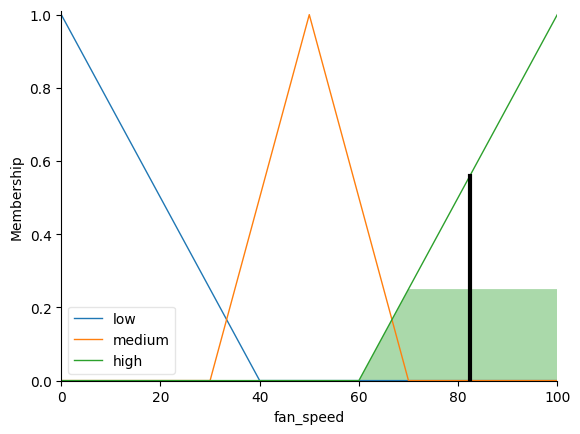

In [23]:
# Install scikit-fuzzy if not already installed
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ------------------- Fuzzy Variables -------------------

# Input fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 51, 1), "temperature")  # temperature 0–50°C

humidity = ctrl.Antecedent(np.arange(0, 101, 1), "humidity")  # humidity 0–100%

# Output fuzzy variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), "fan_speed")  # fan 0–100%


# ------------------- Membership Functions -------------------

# Temperature membership
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

# Humidity membership
humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['normal'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['wet'] = fuzz.trimf(humidity.universe, [60, 100, 100])

# Fan speed membership
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])


# ------------------- Fuzzy Rules -------------------

rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['normal'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'] | humidity['wet'], fan_speed['high'])
rule4 = ctrl.Rule(temperature['warm'] & humidity['wet'], fan_speed['high'])
rule5 = ctrl.Rule(temperature['cold'] & humidity['normal'], fan_speed['low'])

# Add rules
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
system = ctrl.ControlSystemSimulation(controller)

# ------------------- Test the Fuzzy Controller -------------------

# Example values
system.input['temperature'] = 32
system.input['humidity'] = 70

# Compute result
system.compute()

print("Temperature =", 32)
print("Humidity =", 70)
print("Fan Speed Output =", system.output['fan_speed'])

# ------------------- Plot Membership & Result -------------------

temperature.view()
humidity.view()
fan_speed.view(sim=system)
plt.show()